In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.drop(["CustomerID"], axis = 1, inplace = True)

In [8]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


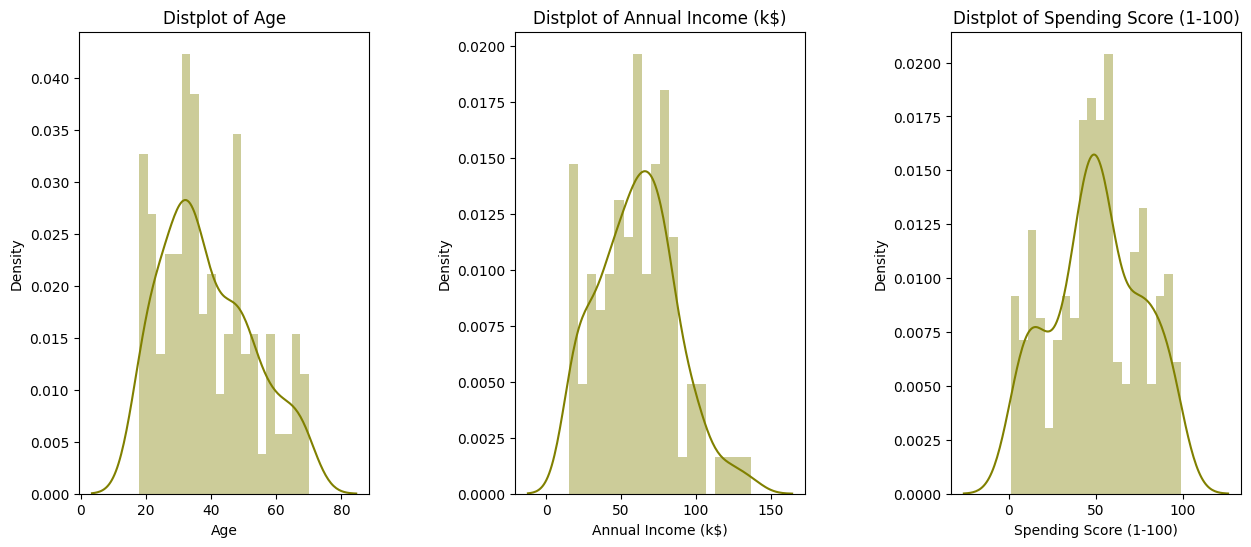

In [9]:
import warnings
warnings.simplefilter('ignore')

plt.figure(1, figsize = (15,6))
n = 0
for x in ["Age", "Annual Income (k$)", "Spending Score (1-100)"]:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    ax = sns.distplot(df[x], bins = 20, color = "olive")
    ax.grid(False)
    plt.title("Distplot of {}".format(x))
plt.show()

In the above distribution plots, the ages between 30 and 37 have the highest density. Most customers have income of between 50,000 to 70,000, and most customers have a spending score of 50.

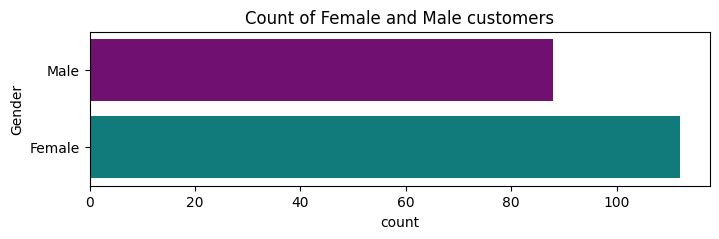

In [10]:
plt.figure(figsize = (8,2))
sns.countplot(y = "Gender", data = df, palette = ["purple", "darkcyan"])
plt.title("Count of Female and Male customers")
plt.show()

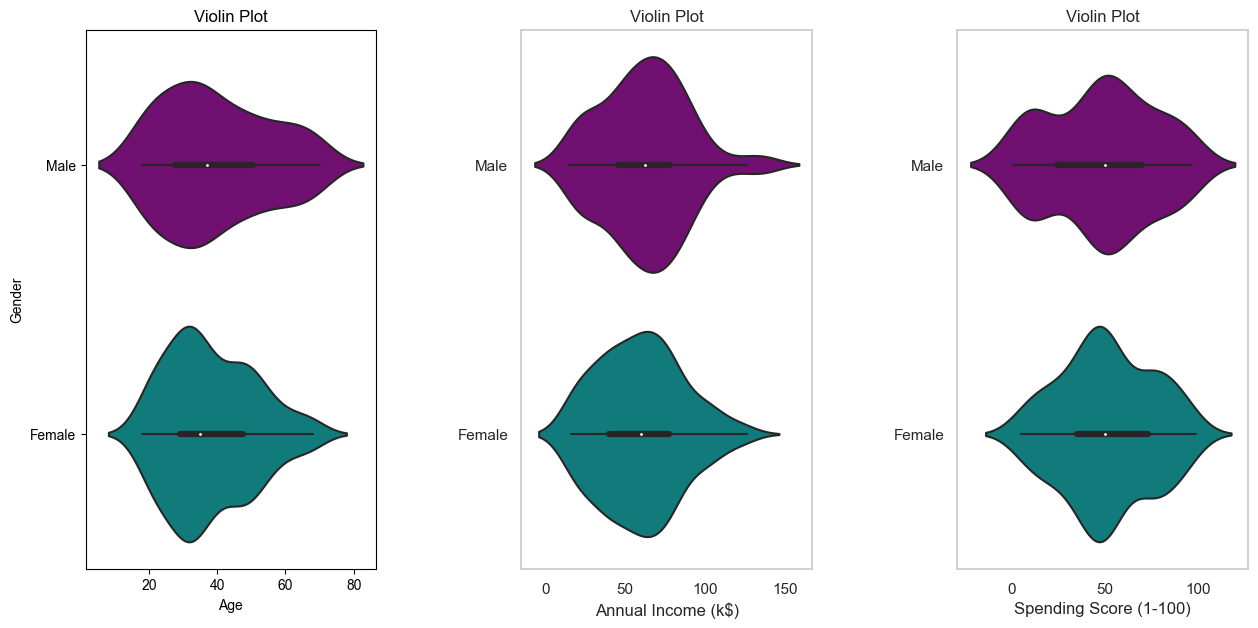

In [11]:
plt.figure(1, figsize = (15,7))
n = 0
for cols in ["Age", "Annual Income (k$)", "Spending Score (1-100)"]:
    n += 1
    plt.subplot(1, 3, n)
    sns.set(style = "whitegrid")
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    ax = sns.violinplot(x = cols, y = "Gender", data = df, palette = ["purple", "DarkCyan"])
    ax.grid(False)
    plt.ylabel("Gender" if n == 1 else "")
    plt.title("Violin Plot")
plt.show()

The peaks, valleys, and tails of the density curve of each group in the above violin plots can be used to make comparisons to spot where groups are similar or different.

##### Changing age from continuous data to a range below

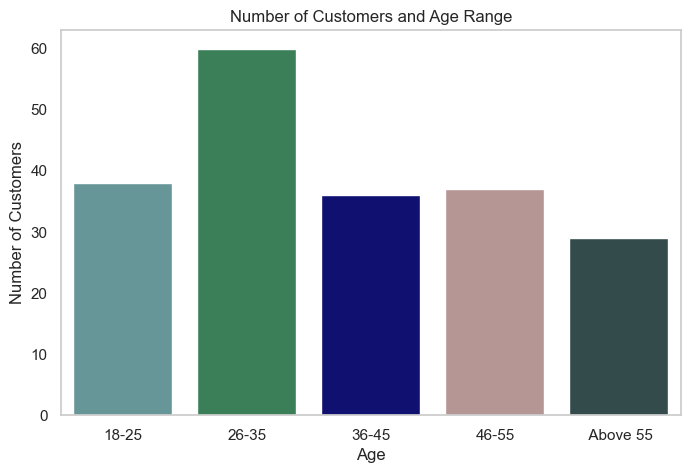

In [12]:
age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_above_55 = df.Age[(df.Age >= 56)]

agex = ["18-25", "26-35", "36-45", "46-55", " Above 55"]
agey = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values), len(age_above_55.values)]

plt.figure(figsize = (8,5))
ax = sns.barplot(x = agex, y = agey, palette = ["#5F9EA0", "#2E8B57", "#000080", "#BC8F8F", "#2F4F4F"])
ax.grid(False)
plt.title("Number of Customers and Age Range")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

##### Understanding the relationship between annual income and the spending score below

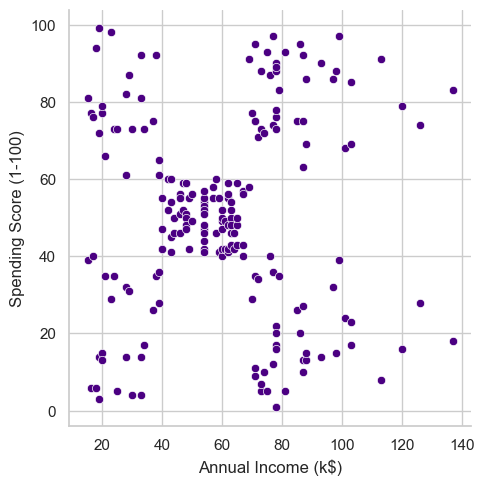

In [13]:
sns.relplot(x = "Annual Income (k$)", y = "Spending Score (1-100)", data = df, color = "#4B0082")
plt.show()

In the above relationship plot, you can see that there is not much relationship between annual income that lies between 20,000-40,000 and spending score. Also, there is no relationship between income that lies between 80,000-140,000. However, there is some relationship between customers that have annual income between $ 40,000-60,000, with a spending score that lies between 40-60.

##### Dividing spending scores into different categories below

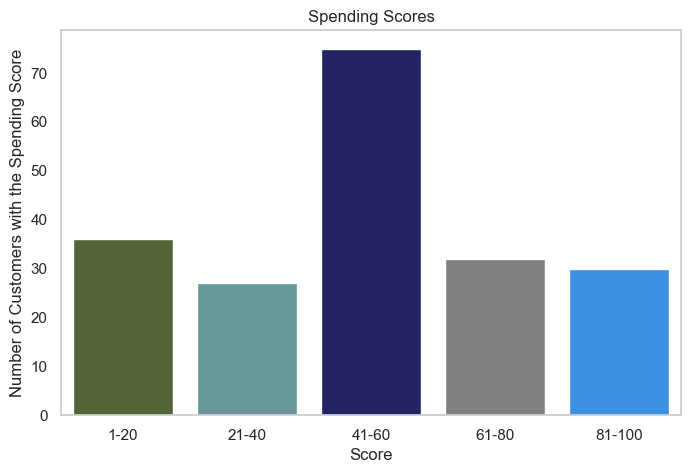

In [14]:
ss_1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss_21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss_41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss_61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss_81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy =[len(ss_1_20.values), len(ss_21_40.values), len(ss_41_60.values), len(ss_61_80.values), len(ss_81_100.values)]

plt.figure(figsize = (8,5))
ax = sns.barplot(x = ssx, y = ssy, palette = ["#556B2F", "#5F9EA0", "#191970", "#808080", "#1E90FF"])
ax.grid(False)
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customers with the Spending Score")
plt.show()

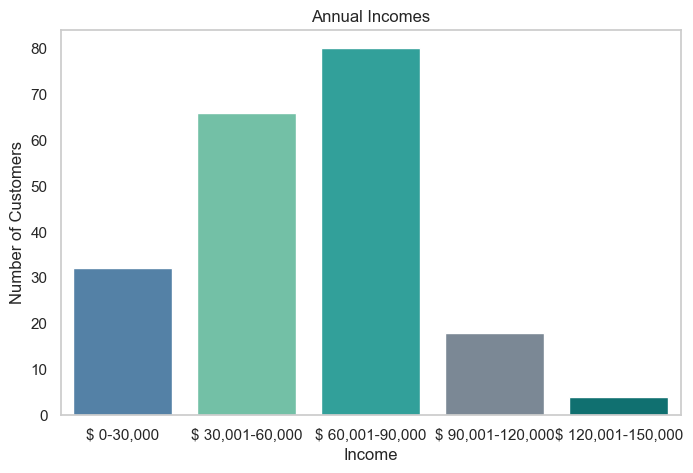

In [15]:
ai_0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai_31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai_61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai_91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai_121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

aix = ["$ 0-30,000", "$ 30,001-60,000", "$ 60,001-90,000", "$ 90,001-120,000", "$ 120,001-150,000"]
aiy = [len(ai_0_30.values), len(ai_31_60.values), len(ai_61_90.values), len(ai_91_120.values), len(ai_121_150.values)]

plt.figure(figsize = (8,5))
ax = sns.barplot(x = aix, y = aiy, palette = ["#4682B4", "#66CDAA", "#20B2AA", "#778899", "#008080"])
ax.grid(False)
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customers")
plt.show()

In the above graph, most customers have annual incomes that lie between 60,000 and 90,000.

##### Finding the optimum number of clusters to create

In [16]:
!pip install scikit-learn

In [17]:
from sklearn.cluster import KMeans

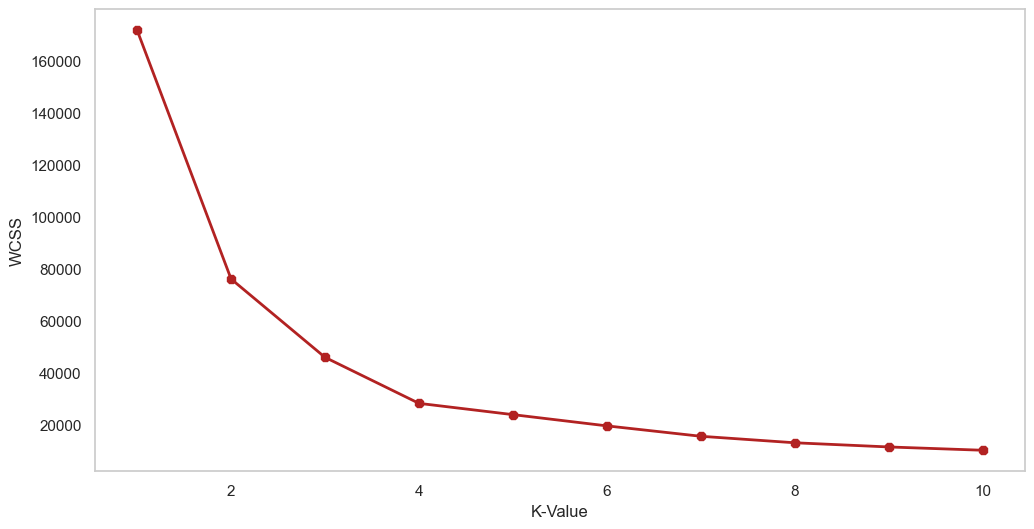

In [18]:
x1 = df.loc[:, ["Age", "Spending Score (1-100)"]].values        # optimum number of clusters based on Age and Spending Score...
wcss = []                                                       # using within-cluster sum of square (wss) method
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = "k-means++")
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (12,6))
plt.grid(False)
plt.plot(range(1,11), wcss, linewidth = 2, color = "#B22222", marker = "8")
plt.xlabel("K-Value")
plt.ylabel("WCSS")
plt.show()

optimum number of clusters is 4

In [19]:
kmeans = KMeans(n_clusters = 4)
label = kmeans.fit_predict(x1)
print(label)

[0 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 0 0 2 1 0 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2
 1 2 1 3 1 3 0 2 0 3 0 0 0 3 0 0 3 3 3 3 3 0 3 3 0 3 3 3 0 3 3 0 0 3 3 3 3
 3 0 3 0 0 3 3 0 3 3 0 3 3 0 0 3 3 0 3 0 0 0 3 0 3 0 0 3 3 0 3 0 3 3 3 3 3
 0 0 0 0 0 3 3 3 3 0 0 0 1 0 1 3 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 3 1
 2 1 2 1 2 1 2 1 2 1 2 1 3 1 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 0
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [20]:
print(kmeans.cluster_centers_)

[[27.61702128 49.14893617]
 [30.1754386  82.35087719]
 [43.29166667 15.02083333]
 [55.70833333 48.22916667]]


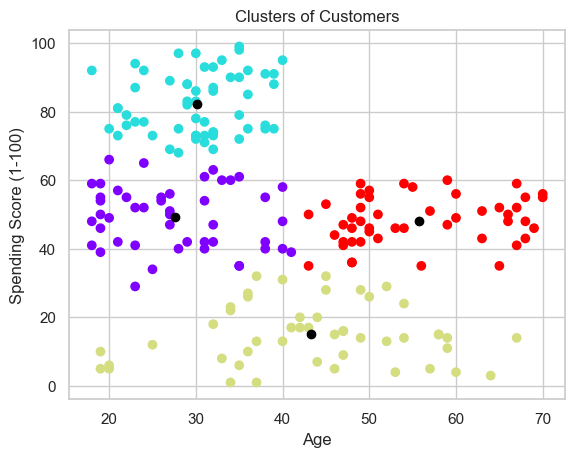

In [24]:
plt.scatter(x1[:,0], x1[:,1], c=kmeans.labels_, cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = "black")
plt.title("Clusters of Customers")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

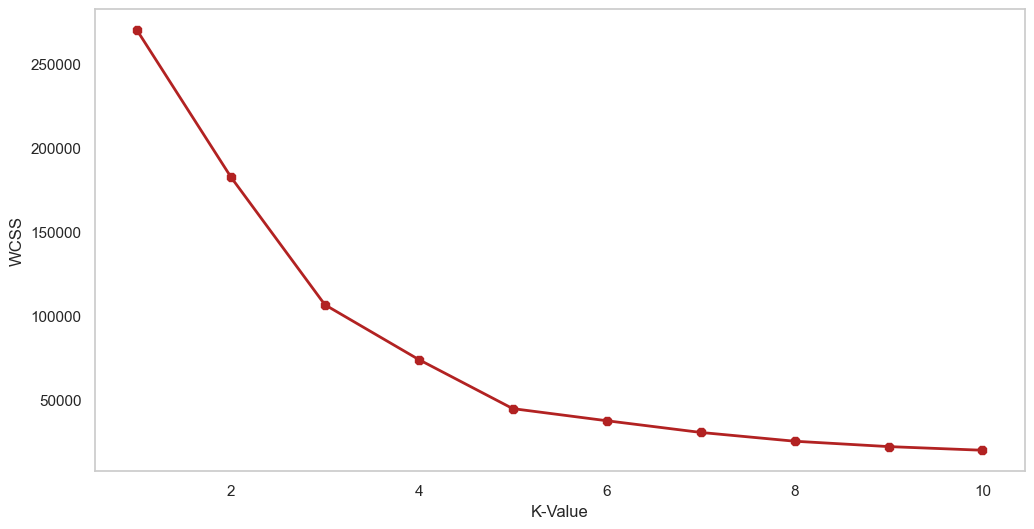

In [25]:
x2 = df.loc[:, ["Annual Income (k$)", "Spending Score (1-100)"]].values # optimum num of clusters based on AnnualINCOME and Spending Score.
wcss = []                                                               # using within-cluster sum of square (wss) method
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = "k-means++")
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (12,6))
plt.grid(False)
plt.plot(range(1,11), wcss, linewidth = 2, color = "#B22222", marker = "8")
plt.xlabel("K-Value")
plt.ylabel("WCSS")
plt.show()

Optimum number of clusters are 5

In [26]:
kmeans = KMeans(n_clusters = 5)
label = kmeans.fit_predict(x2)
print(label)

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 1 0 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 3 2 1 2 3 2 3 2 1 2 3 2 3 2 3 2 3 2 1 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


In [27]:
print(kmeans.cluster_centers_)

[[26.30434783 20.91304348]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [25.72727273 79.36363636]]


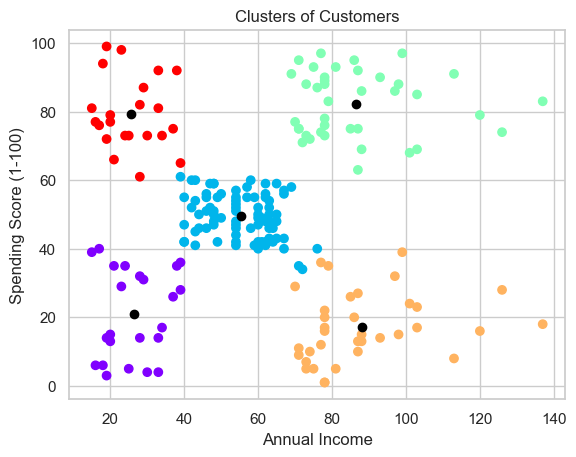

In [28]:
plt.scatter(x2[:,0], x2[:,1], c=kmeans.labels_, cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = "black")
plt.title("Clusters of Customers")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score (1-100)")
plt.show()

##### Clustering customers using Age, Annual Income, and Spending Score below

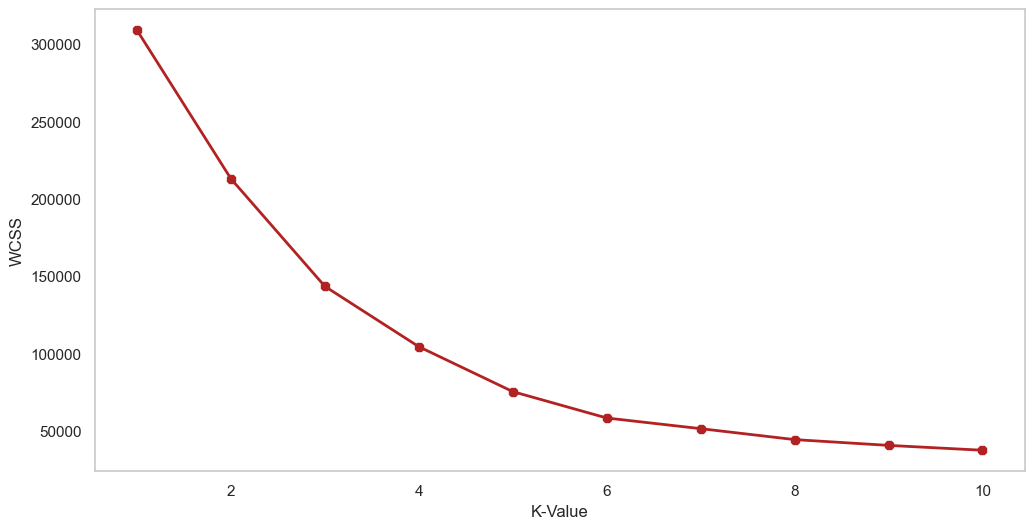

In [29]:
x3 = df.iloc[:,1:]
wcss = []                                                            
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = "k-means++")
    kmeans.fit(x3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (12,6))
plt.grid(False)
plt.plot(range(1,11), wcss, linewidth = 2, color = "#B22222", marker = "8")
plt.xlabel("K-Value")
plt.ylabel("WCSS")
plt.show()

Optimum number of clusters is 5

In [30]:
kmeans = KMeans(n_clusters = 5)
label = kmeans.fit_predict(x3)
print(label)

[1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 3 4 0 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 0 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4]


In [31]:
print(kmeans.cluster_centers_)

[[43.08860759 55.29113924 49.56962025]
 [45.2173913  26.30434783 20.91304348]
 [25.52173913 26.30434783 78.56521739]
 [40.66666667 87.75       17.58333333]
 [32.69230769 86.53846154 82.12820513]]


In [33]:
from mpl_toolkits.mplot3d import Axes3D

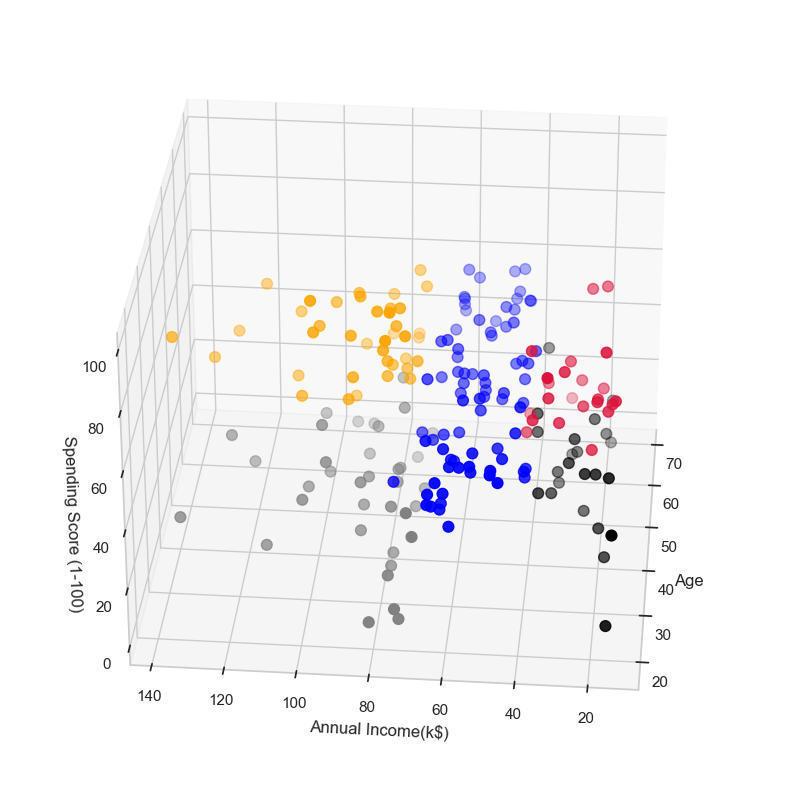

In [35]:
clusters = kmeans.fit_predict(x3)
df["label"] = clusters
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c = "blue", s = 60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c = "orange", s = 60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c = "crimson", s = 60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c = "grey", s = 60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c = "black", s = 60)
ax.view_init(30,185)

plt.xlabel("Age")
plt.ylabel("Annual Income(k$)")
ax.set_zlabel("Spending Score (1-100)")
plt.show()